### Decision Tree Classification

In [1]:
# Import Necessary Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

import os
import sys
sys.path.append(os.path.join(os.path.abspath(".."), (".."), "code"))
#from plotting_functions import *
#from utils import *

import altair as alt
from vega_datasets import data
# Simplify working with large datasets in Altair
alt.data_transformers.enable('vegafusion')


%matplotlib inline
pd.set_option("display.max_colwidth", 200)

# Example 1: House Data

In [2]:
# Load Data
housing_df = pd.read_csv('data/kc_house_data.csv')
housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# Create X and y
X = housing_df.drop(columns = ['id', 'date', 'zipcode', 'price'])
y = housing_df['price']

In [4]:
# Create Baseline Model

# Train a DummyRegressor model 
from sklearn.dummy import DummyRegressor # Import DummyRegressor 

# Create a class object for the sklearn model.
dummy = DummyRegressor()

# fit the dummy regressor
dummy.fit(X, y)

# score the model 
dummy.score(X, y)

0.0

In [5]:
# predict on X using the model
dummy.predict(X)

array([540088.14176653, 540088.14176653, 540088.14176653, ...,
       540088.14176653, 540088.14176653, 540088.14176653], shape=(21613,))

### Bad Example of Decision Tree
- Data Leakage
- Deepest depth
- Overfitting

In [6]:
# Implement Decision Tree Model

from sklearn.tree import DecisionTreeRegressor # Import DecisionTreeRegressor

# Create a class object for the sklearn model.
dt = DecisionTreeRegressor(random_state = 571)

# fit the decision tree regressor
dt.fit(X,y)

# score the model
dt.score(X,y)

0.9991338290544213

In [7]:
dt.get_depth()

38

### Data Splitting
- Train on the train split
- Score on the test split

In [8]:
# Split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 571)

In [9]:
# Instantiate a class object 
dt = DecisionTreeRegressor(random_state = 571)

# Train a decision tree on X_train, y_train
dt.fit(X_train, y_train)

# Score on the train set
dt.score(X_train, y_train)

0.9993924737799647

In [10]:
# Score on the test set
dt.score(X_test, y_test)

# Overfitting due to deepest depth

0.7319677954642736

In [11]:
# max_depth= 1 
dt = DecisionTreeRegressor(max_depth = 1, random_state = 571) 
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,571
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


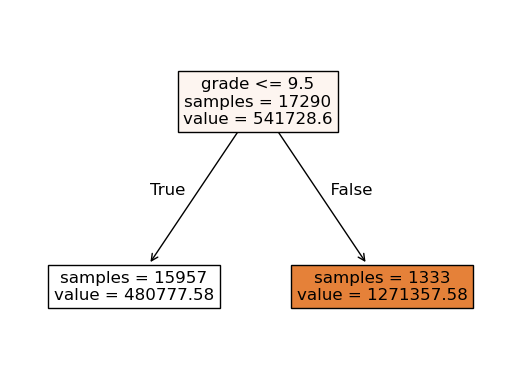

In [12]:
# Visualize your decision stump
from sklearn.tree import plot_tree 
plot_tree(dt, feature_names = X.columns.tolist(), impurity = False, filled = True, fontsize = 12);

In [13]:
dt.score(X_train, y_train) # Score on the train set

0.3183058104158917

In [14]:
dt.score(X_test, y_test) # Score on the test set

# Underfitting due to max_depth = 1 only, even lower than Dummy

0.2872200747114938

### Create Single Validation Set

In [15]:
# Create a validation set 
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 571)

In [16]:
tr_scores = []
valid_scores = []
depths = np.arange(1, 35, 2)

for depth in depths:  
    # Create and fit a decision tree model for the given depth  
    dt = DecisionTreeRegressor(max_depth = depth, random_state = 571)
    
    # Calculate and append r2 scores on the training and validation sets
    dt.fit(X_tr, y_tr) 
    tr_scores.append(dt.score(X_tr, y_tr))
    valid_scores.append(dt.score(X_valid, y_valid))
    
results_single_valid_df = pd.DataFrame(
                        {
                            "train_score": tr_scores, 
                            "valid_score": valid_scores
                        }, 
                        index = depths)
results_single_valid_df

,train_score,valid_score
1,0.324743,0.291266
3,0.623061,0.596636
5,0.761842,0.689416
7,0.845547,0.780737
9,0.899751,0.805349
11,0.941018,0.810863
13,0.967320,0.793839
15,0.982901,0.706932
17,0.991107,0.774689
19,0.995437,0.781773


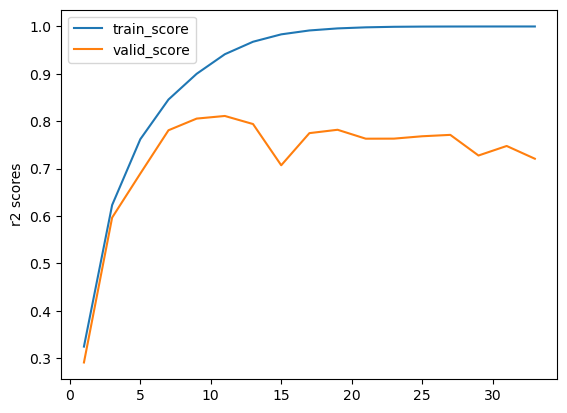

In [17]:
results_single_valid_df[['train_score', 'valid_score']].plot(ylabel='r2 scores');

In [18]:
# Get the index of best score
best_depth = results_single_valid_df['valid_score'].idxmax() 
best_depth

np.int64(11)

In [19]:
test_model = DecisionTreeRegressor(max_depth=best_depth, random_state = 571)
test_model.fit(X_train, y_train)
test_model.score(X_test, y_test)

0.792078033501987

### Cross Validation

In [20]:
np.arange(1, 35, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33])

In [21]:
depths = np.arange(1, 35, 2)

cv_train_scores = []
cv_valid_scores = []
for depth in depths: 
    # Create and fit a decision tree model for the given depth   
    dt = DecisionTreeRegressor(max_depth = depth, random_state = 571)

    # Carry out cross-validation
    scores = cross_validate(dt, X_train, y_train, return_train_score = True)
    cv_train_scores.append(scores["train_score"].mean())
    cv_valid_scores.append(scores["test_score"].mean())

In [22]:
results_df = pd.DataFrame(
    {
        "train_score": cv_train_scores, 
        "valid_score": cv_valid_scores
    },
    index = depths
)
results_df

,train_score,valid_score
1,0.321009,0.306472
3,0.621683,0.592582
5,0.765830,0.707494
7,0.847053,0.748194
9,0.901606,0.770876
11,0.940053,0.773605
13,0.966327,0.766067
15,0.982704,0.747359
17,0.991569,0.738793
19,0.996027,0.735354


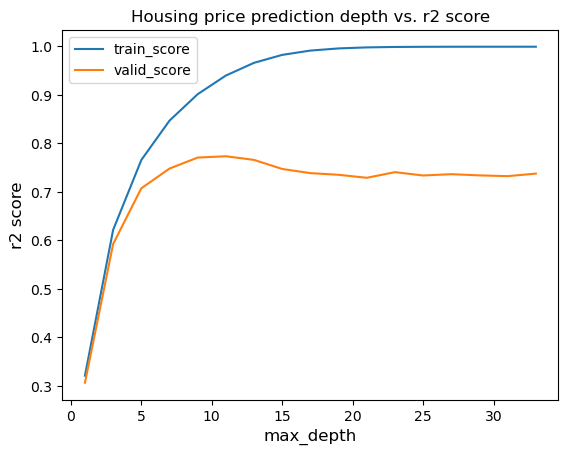

In [23]:
results_df[['train_score', 'valid_score']].plot();
plt.title('Housing price prediction depth vs. r2 score', fontsize=12)  # Adjust title font size
plt.xlabel('max_depth', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('r2 score', fontsize=12);  # Adjust y-axis label font size

In [24]:
best_depth = results_df['valid_score'].idxmax()
best_depth

np.int64(11)

In [25]:
dt_final = DecisionTreeRegressor(max_depth = best_depth, random_state = 571)
dt_final.fit(X_train, y_train)
dt_final.score(X_train, y_train)

0.937030504708169

In [26]:
#What's the depth of the model? 
dt_final.get_depth()

11

### Examine feature importances

In [27]:
dt_final.feature_importances_

array([0.00061198, 0.00426557, 0.25829311, 0.01555612, 0.000843  ,
       0.02533996, 0.01250049, 0.00101056, 0.3670246 , 0.007951  ,
       0.00319581, 0.00530923, 0.00067036, 0.18111182, 0.07626052,
       0.03195113, 0.00810474])

In [28]:
df = pd.DataFrame( 
    data = {
        "features": dt_final.feature_names_in_,
        "feature_importances": dt_final.feature_importances_
    }
)
df.sort_values("feature_importances", ascending = False)

,features,feature_importances
8,grade,0.367025
2,sqft_living,0.258293
13,lat,0.181112
14,long,0.076261
15,sqft_living15,0.031951
5,waterfront,0.025340
3,sqft_lot,0.015556
6,view,0.012500
16,sqft_lot15,0.008105
9,sqft_above,0.007951


# Example 2: Quiz 2 Data

In [29]:
classification_df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
classification_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


In [30]:
classification_df["quiz2"].value_counts()

quiz2
not A+    11
A+        10
Name: count, dtype: int64

In [31]:
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]

In [32]:
from sklearn.dummy import DummyClassifier  # import the classifier

dummy_clf = DummyClassifier(strategy = "most_frequent")  # Create a classifier object

In [33]:
# fit the classifier
dummy_clf.fit(X, y)

,strategy,'most_frequent'
,random_state,None
,constant,None


In [34]:
# predict using the trained classifier
dummy_clf.predict(X)

array(['not A+', 'not A+', 'not A+', 'not A+', 'not A+', 'not A+',
       'not A+', 'not A+', 'not A+', 'not A+', 'not A+', 'not A+',
       'not A+', 'not A+', 'not A+', 'not A+', 'not A+', 'not A+',
       'not A+', 'not A+', 'not A+'], dtype='<U6')

In [35]:
# Score the model
print("The accuracy of the model on the training data: %0.3f" % (dummy_clf.score(X, y)))

The accuracy of the model on the training data: 0.524


In [36]:
# Decision Tree with Binary Features
# Binarize dataset
X_binary = X.copy()
columns = ["lab1", "lab2", "lab3", "lab4", "quiz1"]
for col in columns:
    X_binary[col] = X_binary[col].apply(lambda x: 1 if x >= 90 else 0)
X_binary.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,1,1,0,1,1
1,1,0,1,1,0,0,1
2,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0
4,0,1,0,0,1,1,0


In [37]:
y.head()

0        A+
1    not A+
2    not A+
3        A+
4        A+
Name: quiz2, dtype: object

In [38]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_binary, y)
dummy_clf.score(X_binary, y)

0.5238095238095238

In [39]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()  # Create a decision tree
model.fit(X_binary, y)  # Fit a decision tree
model.score(X_binary, y)  # Assess the model

0.9047619047619048

[Text(0.5, 0.9166666666666666, 'lab4 <= 0.5\nsamples = 21\nvalue = [10, 11]\nclass = not A+'),
 Text(0.3333333333333333, 0.75, 'lab1 <= 0.5\nsamples = 9\nvalue = [2, 7]\nclass = not A+'),
 Text(0.41666666666666663, 0.8333333333333333, 'True  '),
 Text(0.25, 0.5833333333333334, 'quiz1 <= 0.5\nsamples = 6\nvalue = [2, 4]\nclass = not A+'),
 Text(0.16666666666666666, 0.4166666666666667, 'lab3 <= 0.5\nsamples = 5\nvalue = [1, 4]\nclass = not A+'),
 Text(0.08333333333333333, 0.25, 'samples = 4\nvalue = [0, 4]\nclass = not A+'),
 Text(0.25, 0.25, 'samples = 1\nvalue = [1, 0]\nclass = A+'),
 Text(0.3333333333333333, 0.4166666666666667, 'samples = 1\nvalue = [1, 0]\nclass = A+'),
 Text(0.4166666666666667, 0.5833333333333334, 'samples = 3\nvalue = [0, 3]\nclass = not A+'),
 Text(0.6666666666666666, 0.75, 'class_attendance <= 0.5\nsamples = 12\nvalue = [8, 4]\nclass = A+'),
 Text(0.5833333333333333, 0.8333333333333333, '  False'),
 Text(0.5833333333333334, 0.5833333333333334, 'samples = 2\nvalue

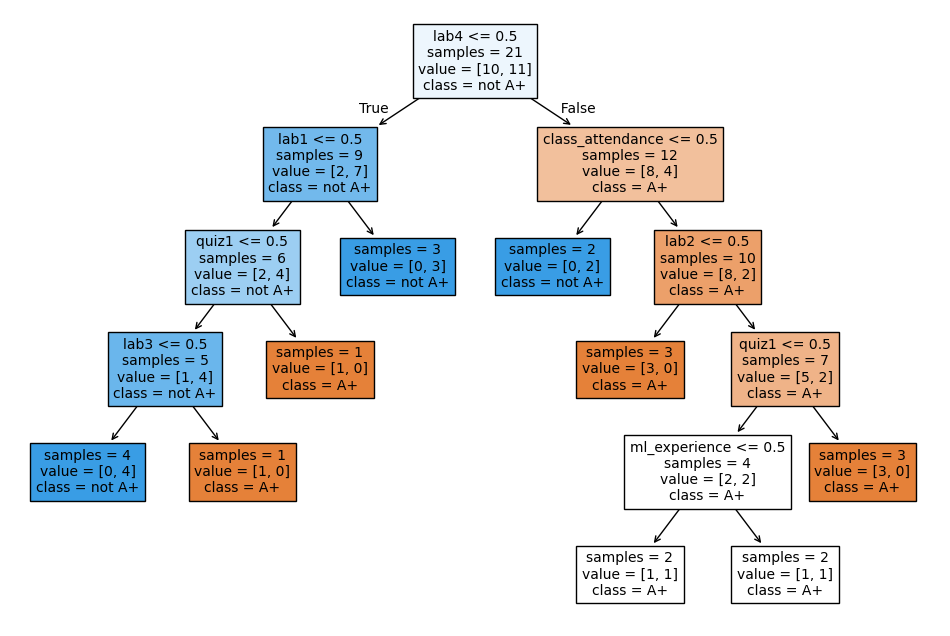

In [40]:
# Call the custom_plot_tree function to visualize the customized tree
width = 12
height = 8
plt.figure(figsize=(width, height))
plot_tree(
    model,
    feature_names = X_binary.columns.tolist(),
    class_names = ["A+", "not A+"],
    impurity = False,
    fontsize = 10,
    filled = True
)

In [41]:
new_example = np.array([[0, 1, 0, 0, 1, 1, 1]])
pd.DataFrame(data=new_example, columns=X.columns)

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,0,1,0,0,1,1,1


In [42]:
model.predict(new_example)

/Users/wnsong/miniforge3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['A+'], dtype=object)

[Text(0.3, 0.9166666666666666, 'lab3 <= 83.5\nsamples = 21\nvalue = [10, 11]\nclass = not A+'),
 Text(0.2, 0.75, 'samples = 6\nvalue = [0, 6]\nclass = not A+'),
 Text(0.25, 0.8333333333333333, 'True  '),
 Text(0.4, 0.75, 'quiz1 <= 83.5\nsamples = 15\nvalue = [10, 5]\nclass = A+'),
 Text(0.35, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'lab2 <= 88.0\nsamples = 4\nvalue = [1, 3]\nclass = not A+'),
 Text(0.1, 0.4166666666666667, 'samples = 1\nvalue = [1, 0]\nclass = A+'),
 Text(0.3, 0.4166666666666667, 'samples = 3\nvalue = [0, 3]\nclass = not A+'),
 Text(0.6, 0.5833333333333334, 'lab4 <= 83.5\nsamples = 11\nvalue = [9, 2]\nclass = A+'),
 Text(0.5, 0.4166666666666667, 'samples = 1\nvalue = [0, 1]\nclass = not A+'),
 Text(0.7, 0.4166666666666667, 'lab2 <= 94.5\nsamples = 10\nvalue = [9, 1]\nclass = A+'),
 Text(0.6, 0.25, 'samples = 8\nvalue = [8, 0]\nclass = A+'),
 Text(0.8, 0.25, 'lab1 <= 96.5\nsamples = 2\nvalue = [1, 1]\nclass = A+'),
 Text(0.7, 0.08333333333333333, 

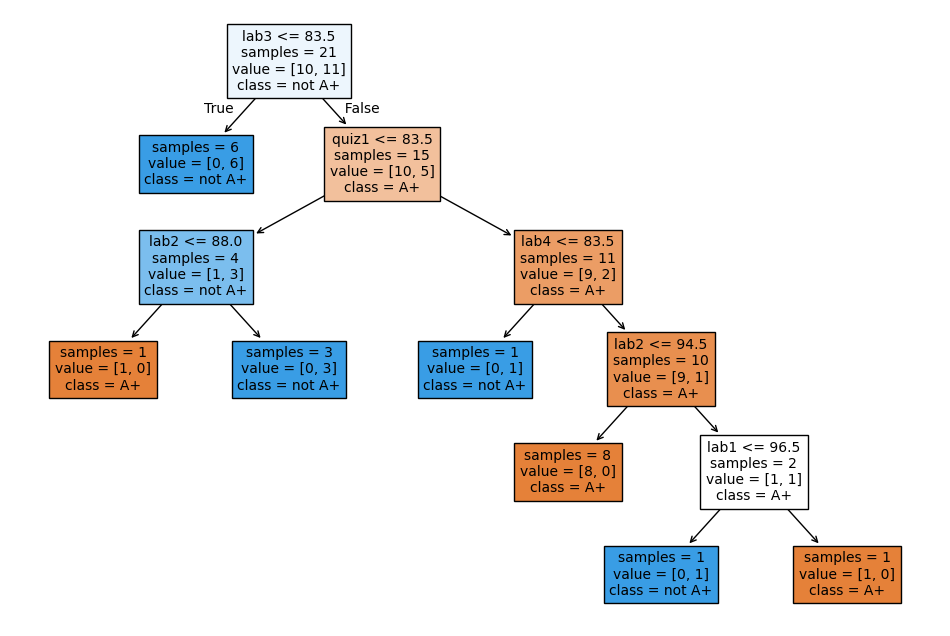

In [43]:
# Decision Tree with Continuous Features
width = 12
height = 8
model = DecisionTreeClassifier()
model.fit(X, y)
plt.figure(figsize=(width, height))
plot_tree(
    model,
    feature_names=X_binary.columns.tolist(),
    class_names=["A+", "not A+"],
    impurity=False,
    fontsize=10,
    filled = True
)

In [44]:
regression_df = pd.read_csv("data/quiz2-grade-toy-regression.csv")
regression_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,90
1,1,0,94,90,80,83,91,84
2,0,0,78,85,83,80,80,82
3,0,1,91,94,92,91,89,92
4,0,1,77,83,90,92,85,90


In [45]:
X = regression_df.drop(["quiz2"], axis=1)
y = regression_df["quiz2"]

depth = 2
reg_model = DecisionTreeRegressor(max_depth=depth)
reg_model.fit(X, y)
regression_df["predicted_quiz2"] = reg_model.predict(X)
print("R^2 score on the training data: %0.3f\n\n" % (reg_model.score(X, y)))
regression_df.head()

R^2 score on the training data: 0.989




,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2,predicted_quiz2
0,1,1,92,93,84,91,92,90,90.333333
1,1,0,94,90,80,83,91,84,83.000000
2,0,0,78,85,83,80,80,82,83.000000
3,0,1,91,94,92,91,89,92,92.000000
4,0,1,77,83,90,92,85,90,90.333333


# Example 3: Spotify Data

In [46]:
# Importing the dataset
spotify_df = pd.read_csv('/Users/wnsong/Documents/GitHub/ml_in_python/data/spotify.csv', index_col = 0)
spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [47]:
# split dataframe before setup X, y
# This method only split dataframe into train and test but not X,y. The dataframe input is only one dataframe
train_df, test_df = train_test_split(spotify_df, test_size = 0.4, random_state = 571)

# The other method is split train and test and X, y beforehand. The dataframe inputs are 2 dataframes.
# But we need to define X, y first
# X = spotify_df.drop(columns='target')
# y = spotify_df['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=571)

In [48]:
# EDA
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 773 to 1513
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1210 non-null   float64
 1   danceability      1210 non-null   float64
 2   duration_ms       1210 non-null   int64  
 3   energy            1210 non-null   float64
 4   instrumentalness  1210 non-null   float64
 5   key               1210 non-null   int64  
 6   liveness          1210 non-null   float64
 7   loudness          1210 non-null   float64
 8   mode              1210 non-null   int64  
 9   speechiness       1210 non-null   float64
 10  tempo             1210 non-null   float64
 11  time_signature    1210 non-null   float64
 12  valence           1210 non-null   float64
 13  target            1210 non-null   int64  
 14  song_title        1210 non-null   object 
 15  artist            1210 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory us

In [49]:
train_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.00000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,0.187411,0.613244,246443.138017,0.683577,0.144348,5.297521,0.191150,-7.090168,0.61405,0.090702,121.918430,3.966942,0.489935,0.507438
std,0.259036,0.163044,80570.150502,0.210185,0.283427,3.647052,0.152934,3.797043,0.48702,0.088134,26.826888,0.261506,0.250787,0.500151
min,0.000003,0.122000,16042.000000,0.014800,0.000000,0.000000,0.018800,-33.097000,0.00000,0.023100,59.385000,1.000000,0.034800,0.000000
25%,0.008958,0.510000,200136.500000,0.564000,0.000000,2.000000,0.093150,-8.335750,0.00000,0.036900,100.339500,4.000000,0.284000,0.000000
50%,0.062550,0.624000,229000.000000,0.720000,0.000112,6.000000,0.127000,-6.238500,1.00000,0.054400,120.987500,4.000000,0.476500,1.000000
75%,0.268750,0.733000,271443.250000,0.847750,0.074725,8.000000,0.247000,-4.824500,1.00000,0.104000,138.021750,4.000000,0.689000,1.000000
max,0.995000,0.967000,849960.000000,0.998000,0.976000,11.000000,0.969000,-0.307000,1.00000,0.816000,219.331000,5.000000,0.975000,1.000000


In [50]:
# Split Train and Test
X_train = train_df.drop(columns=["target", "song_title", "artist"])
y_train = train_df["target"]

X_test = test_df.drop(columns=["target", "song_title", "artist"])
y_test = test_df["target"]

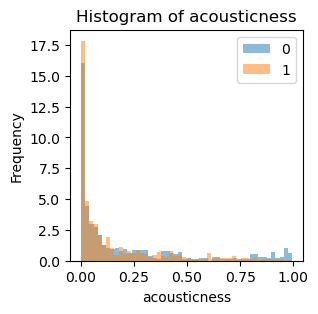

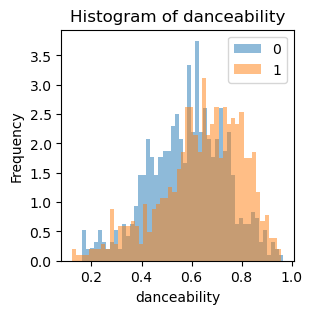

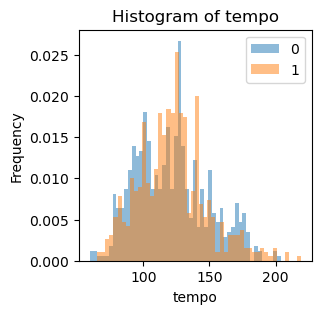

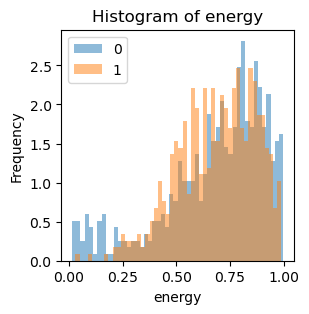

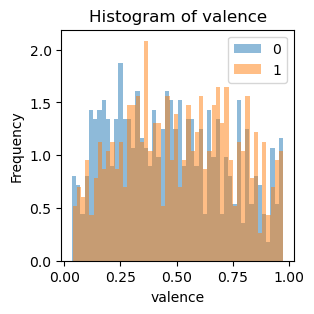

In [51]:
feat = ["acousticness","danceability","tempo","energy","valence"]
for f in feat:
    plt.figure(figsize=(3, 3))
    train_df.groupby("target")[f].plot.hist(bins = 50, alpha = 0.5, legend = True, density = True, title = "Histogram of " + f)
    plt.xlabel(f)
    plt.show()

### Create Baseline Dummy

In [52]:
dummy_clf = DummyClassifier(random_state = 571)
dummy_clf.fit(X_train, y_train) # Only fit on Train Data
dummy_score = dummy_clf.score(X_train, y_train)
dummy_score

0.5074380165289256

In [53]:
# Create Tree Classifier
spotify_tree = DecisionTreeClassifier(random_state = 571)

# Cross Validate
dt_scores_df = pd.DataFrame(cross_validate(spotify_tree, X_train, y_train, cv = 10, return_train_score = True))
dt_scores_df

,fit_time,score_time,test_score,train_score
0,0.005910,0.000485,0.661157,0.999082
1,0.005956,0.000414,0.669421,0.999082
2,0.005970,0.000383,0.694215,0.999082
3,0.005228,0.000403,0.677686,0.999082
4,0.005775,0.000370,0.710744,0.999082
5,0.005601,0.000392,0.743802,0.999082
6,0.005791,0.000369,0.727273,0.999082
7,0.005911,0.000394,0.652893,1.000000
8,0.005594,0.000366,0.677686,1.000000
9,0.005609,0.000393,0.677686,0.999082


In [54]:
# Overfitting
dt_scores_df.mean()

fit_time       0.005735
score_time     0.000397
test_score     0.689256
train_score    0.999265
dtype: float64

### Tunning Hyperparameter and Cross-Validate

In [55]:
depths = np.arange(1, 25, 2)
depths

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

In [56]:
result_list = []
for d in depths:
    spotify_tree = DecisionTreeClassifier(random_state = 571, max_depth = d)
    cv_result = cross_validate(spotify_tree, X_train, y_train, cv = 10, return_train_score = True)

    result_list.append({
        'max_depth': d,
        'mean_cv_accuracy': np.mean(cv_result['test_score']),
        'mean_train_accuracy': np.mean(cv_result['train_score']),
    })

results_df = pd.DataFrame(result_list).set_index('max_depth')
results_df

,mean_cv_accuracy,mean_train_accuracy
max_depth,,
1,0.630579,0.648301
3,0.710744,0.749128
5,0.733058,0.806244
7,0.695868,0.879890
9,0.689256,0.942149
11,0.699174,0.976125
13,0.692562,0.991736
15,0.695041,0.997888
17,0.691736,0.998990


<Axes: xlabel='max_depth'>

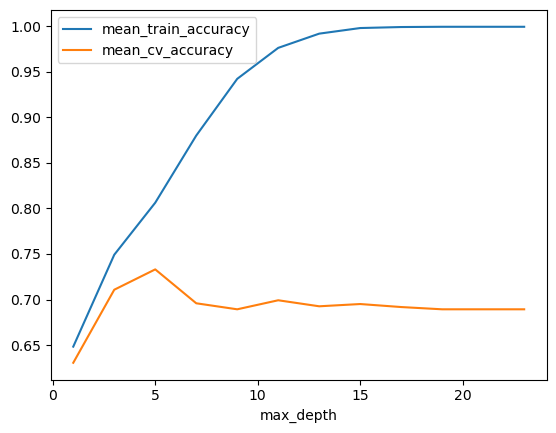

In [57]:
results_df[["mean_train_accuracy", "mean_cv_accuracy"]].plot()

In [58]:
# Find the index of best hyperparameter
best_max_depth = results_df['mean_cv_accuracy'].idxmax()
best_max_depth

np.int64(5)

In [59]:
result_dict = {
    "depth": [],
    "mean_train_accuracy": [],
    "mean_cv_accuracy": [],
    "mean_train_error": [],
    "mean_cv_error": [],
    "std_train_error": [],
    "std_cv_error": []    
}
param_grid = {"max_depth": np.arange(1,25,2)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth = depth)
    scores = cross_validate(model, X_train, y_train, cv = 10, return_train_score = True)
    result_dict["depth"].append(depth)
    result_dict['mean_train_accuracy'].append(np.mean(scores['train_score']))
    result_dict['mean_cv_accuracy'].append(np.mean(scores['test_score']))
    result_dict["mean_train_error"].append(1 - np.mean(scores["train_score"]))
    result_dict["mean_cv_error"].append(1 - np.mean(scores["test_score"]))
    result_dict["std_train_error"].append(scores["train_score"].std())
    result_dict["std_cv_error"].append(scores["test_score"].std())
    
results_df = pd.DataFrame(result_dict).set_index("depth")
results_df

,mean_train_accuracy,mean_cv_accuracy,mean_train_error,mean_cv_error,std_train_error,std_cv_error
depth,,,,,,
1,0.648301,0.630579,0.351699,0.369421,0.004480,0.035073
3,0.749128,0.710744,0.250872,0.289256,0.008543,0.023666
5,0.806244,0.730579,0.193756,0.269421,0.002933,0.033713
7,0.879706,0.695041,0.120294,0.304959,0.007984,0.024917
9,0.942149,0.696694,0.057851,0.303306,0.007661,0.033682
11,0.976309,0.686777,0.023691,0.313223,0.007275,0.030354
13,0.991368,0.687603,0.008632,0.312397,0.003366,0.023022
15,0.998072,0.685950,0.001928,0.314050,0.001043,0.027410
17,0.999174,0.685950,0.000826,0.314050,0.000495,0.030253


<Axes: xlabel='depth'>

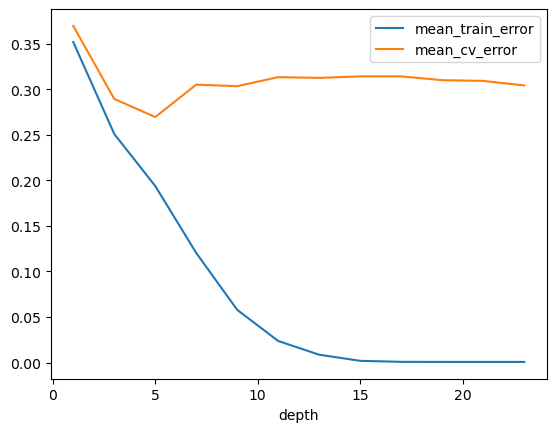

In [60]:
results_df[["mean_train_error", "mean_cv_error"]].plot()

In [61]:
# Fit the Model Using the best depth
best_model = DecisionTreeClassifier(random_state = 571, max_depth = best_max_depth)
best_model.fit(X_train, y_train)
best_model_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

In [62]:
best_model_score

0.8008264462809918

In [63]:
test_score

0.7125154894671624

In [64]:
# Score Difference
best_model_score - test_score

0.08831095681382939

In [65]:
# Get Feature Importances
importances = best_model.feature_importances_

# Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by = 'importance', ascending = False)

print(feature_importance_df)

             feature  importance
4   instrumentalness    0.221324
3             energy    0.162918
9        speechiness    0.154407
7           loudness    0.138401
12           valence    0.101472
1       danceability    0.096367
2        duration_ms    0.068355
0       acousticness    0.025387
10             tempo    0.015043
6           liveness    0.010660
5                key    0.005667
8               mode    0.000000
11    time_signature    0.000000


[Text(0.546875, 0.9166666666666666, 'instrumentalness <= 0.0\nsamples = 1210\nvalue = [596, 614]\nclass = 0'),
 Text(0.3333333333333333, 0.75, 'speechiness <= 0.101\nsamples = 605\nvalue = [388.0, 217.0]\nclass = 1'),
 Text(0.44010416666666663, 0.8333333333333333, 'True  '),
 Text(0.16666666666666666, 0.5833333333333334, 'danceability <= 0.779\nsamples = 412\nvalue = [313, 99]\nclass = 1'),
 Text(0.08333333333333333, 0.4166666666666667, 'instrumentalness <= 0.0\nsamples = 363\nvalue = [289, 74]\nclass = 1'),
 Text(0.041666666666666664, 0.25, 'speechiness <= 0.034\nsamples = 307\nvalue = [254, 53]\nclass = 1'),
 Text(0.020833333333333332, 0.08333333333333333, 'samples = 94\nvalue = [89, 5]\nclass = 1'),
 Text(0.0625, 0.08333333333333333, 'samples = 213\nvalue = [165, 48]\nclass = 1'),
 Text(0.125, 0.25, 'liveness <= 0.125\nsamples = 56\nvalue = [35, 21]\nclass = 1'),
 Text(0.10416666666666667, 0.08333333333333333, 'samples = 25\nvalue = [20, 5]\nclass = 1'),
 Text(0.14583333333333334, 0

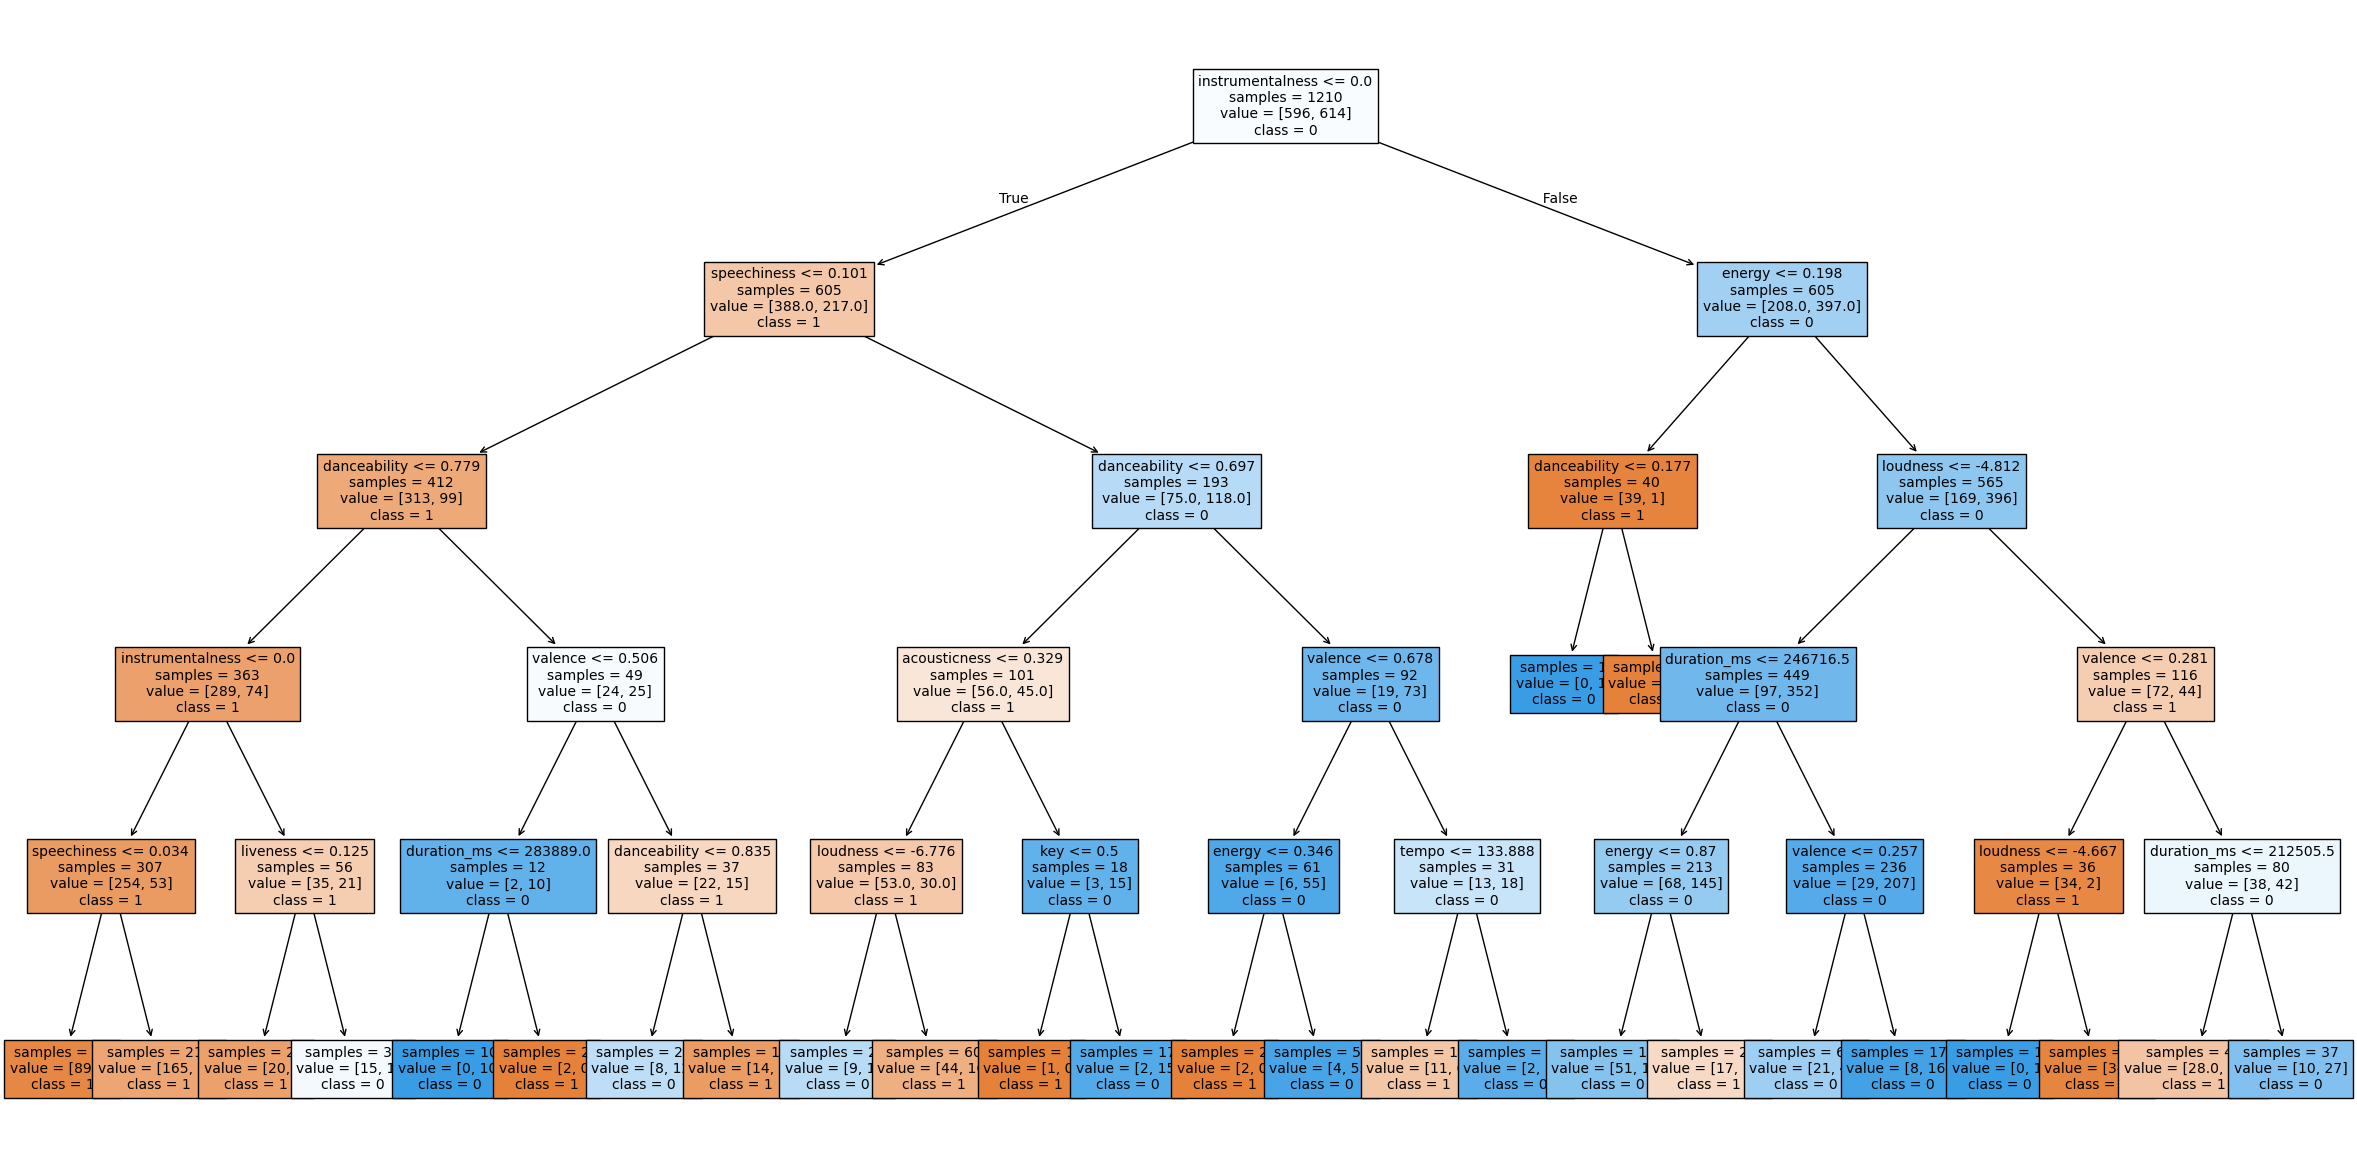

In [66]:
width = 30
height = 15
plt.figure(figsize=(width, height))
plot_tree(
    best_model,
    feature_names = X_train.columns.tolist(),
    class_names = ["1", "0"],
    impurity = False,
    fontsize = 10,
    filled = True
)

# Pros and Cons of Decision Tree Model

### Pros

- ***Easy to interpret:*** the tree structure is intuitive and can be visualized, making it idea for explaining decisions to non-technical stakeholders.
- ***No need for feature scaling:*** decision trees are invariant to monotonic transformations, only cares about the order and split-point of a feature, not its magnitude.
- ***Handles both numerical and categorical data:*** can split on both types of variables without preprocessing.
- ***Captures non-linear relationships:*** splits can model complex interactions between features.
- ***Requires little data preparation:*** no need for dummy variables or imputation (can handle missing values natively in some implementations).
- ***Fast inference:*** once trained, predictions are quick and efficient.

### Cons

- ***Prone to overfitting:*** especially with deep trees, they can memorize training data and generalize poorly.
- ***Unstable to small data changes:*** small changes in data can lead to very different splits and structures.
- ***Greedy splitting:*** the recursive split strategy is locally optimal, not globally optimal.
- ***Biased toward features with more levels:*** features with many unique values can dominate splits. (e.g., IDs, drop or encode such feature)
- ***Poor extrapolation:*** trees partition the feature space and don't generalize well outside the training range
- ***Not ideal for smooth boundaries:*** struggles with problems where the decision boundary is continuous or curved

### PS.
- Single decision tree is almost never the best-performing model on its own, thus a good baseline model to start with.

### Hyperparameter
- ***max_depth:*** prune it to find the best depth.

### Key Pitfalls of Decision Tree Models
1. Overfitting
Problem: Trees can grow too deep, capturing noise and idiosyncrasies in the training data.

Impact: Poor generalization to unseen data.

Mitigation: Use pruning (max_depth, min_samples_split), or switch to ensemble methods like Random Forests or Gradient Boosting.

2. High Variance
Problem: Small changes in training data can lead to very different tree structures.

Impact: Unstable predictions and inconsistent model behavior.

Mitigation: Use ensemble methods to average out variance.

3. Bias Toward Features with Many Unique Values
Problem: Features like IDs or timestamps can dominate splits due to high cardinality.

Impact: Uninformative or misleading splits.

Mitigation: Drop or encode such features carefully; consider feature selection.

4. Greedy Splitting Algorithm
Problem: Trees make locally optimal decisions at each node without considering global structure.

Impact: Suboptimal tree architecture.

Mitigation: Use hyperparameter tuning and ensemble methods to compensate.

5. Difficulty Capturing Linear Relationships
Problem: Trees create stepwise partitions, which poorly approximate smooth linear trends.

Impact: Reduced performance on linearly separable data.

Mitigation: Consider linear models or hybrid approaches.

6. Sensitivity to Class Imbalance
Problem: Trees may favor majority classes in imbalanced datasets.

Impact: Skewed predictions and poor minority class performance.

Mitigation: Use class weights, resampling, or balanced metrics like balanced_accuracy.

7. Computational Cost on Large Datasets
Problem: Deep trees with many features can be expensive to train and interpret.

Impact: Slow training and complex visualizations.

Mitigation: Limit depth, use feature selection, or switch to scalable tree-based ensembles.

### Best Practices
- Always validate with cross-validation to detect overfitting.

- Use plot_tree() or export_graphviz() to inspect splits and feature usage.

- Prefer ensemble methods (Random Forests or Boosting or Stacking) for production models unless interpretability is paramount.